In [ ]:
import numpy as np

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import zipfile
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

In [ ]:
source_path = '/content/drive/MyDrive/Datasetdsp'

source_path_healty = os.path.join(source_path, 'Healthy')
source_path_parkinson = os.path.join(source_path, 'Parkinson')


print(f"There are {len(os.listdir(source_path_healty))} images of Healty.")
print(f"There are {len(os.listdir(source_path_parkinson))} images of Parkinson.")


_1_files = os.listdir(source_path_healty)
print(_1_files[:10])

_2_files = os.listdir(source_path_parkinson)
print(_2_files[:10])


There are 1632 images of Healty.
There are 1632 images of Parkinson.
['Healthy967.png', 'Healthy502.png', 'Healthy340.png', 'Healthy424.png', 'Healthy887.png', 'Healthy754.png', 'Healthy748.png', 'Healthy684.png', 'Healthy228.png', 'Healthy689.png']
['Parkinson292.png', 'Parkinson563.png', 'Parkinson979.png', 'Parkinson645.png', 'Parkinson866.png', 'Parkinson950.png', 'Parkinson226.png', 'Parkinson714.png', 'Parkinson486.png', 'Parkinson462.png']


In [ ]:
def convert_to_jpg(input_path, output_path):
    try:
        img = Image.open(input_path)
        if img.format != 'JPEG':
            img = img.convert('RGB')
            img.save(output_path, 'JPEG', quality=95)
            os.remove(input_path)
            print(f"File {input_path} berhasil dikonversi ke JPEG: {output_path}")
    except Exception as e:
        print(f"Error dalam mengonversi file {input_path} ke JPEG: {e}")

def convert_folder_to_jpg_and_remove_original(source_path):
    for root, dirs, files in os.walk(source_path):
        for file in files:
            file_path = os.path.join(root, file)
            if file.lower().endswith(('.png', '.webp', '.jpeg')):
                output_path = os.path.splitext(file_path)[0] + '.jpg'
                convert_to_jpg(file_path, output_path)


source_paths = [
    source_path_healty, source_path_parkinson
]


for path in source_paths:
    convert_folder_to_jpg_and_remove_original(path)

In [ ]:
root_dir = '/content/drive/MyDrive/Datasetdsp/New'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):

  make_train_dir=os.path.join(root_dir,'training')
  make_validation_dir=os.path.join(root_dir,'validation')

  os.makedirs(make_train_dir)
  os.makedirs(make_validation_dir)

  train_1_dir=os.path.join(make_train_dir,'Healthy')
  train_2_dir=os.path.join(make_train_dir,'Parkinson')

  validation_1_dir=os.path.join(make_validation_dir,'Healthy')
  validation_2_dir=os.path.join(make_validation_dir,'Parkinson')


  os.makedirs(train_1_dir)
  os.makedirs(validation_1_dir)
  os.makedirs(train_2_dir)
  os.makedirs(validation_2_dir)

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/drive/MyDrive/Datasetdsp/New/training
/content/drive/MyDrive/Datasetdsp/New/validation
/content/drive/MyDrive/Datasetdsp/New/training/Healthy
/content/drive/MyDrive/Datasetdsp/New/training/Parkinson
/content/drive/MyDrive/Datasetdsp/New/validation/Healthy
/content/drive/MyDrive/Datasetdsp/New/validation/Parkinson


copy ke directory yang udah dibuat

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  list_files=os.listdir(SOURCE_DIR)

  list_files=[
      list_file for list_file in list_files if os.path.getsize(os.path.join(SOURCE_DIR, list_file))>0
  ]

  split_size=int(len(list_files)*SPLIT_SIZE)

  training_file=list_files[:split_size]
  validation_file=list_files[split_size:]

  for file in training_file:
    source_file=os.path.join(SOURCE_DIR, file)
    destination_file=os.path.join(TRAINING_DIR, file)
    copyfile(source_file,destination_file)

  for file in validation_file:
    source_file=os.path.join(SOURCE_DIR, file)
    destination_file=os.path.join(VALIDATION_DIR, file)
    copyfile(source_file,destination_file)

In [ ]:
_1_SOURCE_DIR = "/content/drive/MyDrive/Datasetdsp/Healthy"
_2_SOURCE_DIR = "/content/drive/MyDrive/Datasetdsp/Parkinson"

TRAINING_DIR = "/content/drive/MyDrive/Datasetdsp/New/training"
VALIDATION_DIR = "/content/drive/MyDrive/Datasetdsp/New/validation"

TRAINING_1_DIR = os.path.join(TRAINING_DIR, "Healthy/")
VALIDATION_1_DIR = os.path.join(VALIDATION_DIR, "Healthy/")

TRAINING_2_DIR = os.path.join(TRAINING_DIR, "Parkinson/")
VALIDATION_2_DIR = os.path.join(VALIDATION_DIR, "Parkinson/")


if len(os.listdir(TRAINING_1_DIR)) > 0:
  for file in os.scandir(TRAINING_1_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_2_DIR)) > 0:
  for file in os.scandir(TRAINING_2_DIR):
    os.remove(file.path)


split_size = .9

split_data(_1_SOURCE_DIR, TRAINING_1_DIR, VALIDATION_1_DIR, split_size)
split_data(_2_SOURCE_DIR, TRAINING_2_DIR, VALIDATION_2_DIR, split_size)



print(f"\n\nHealthy has {len(os.listdir(_1_SOURCE_DIR))} images\n")
print(f"Parkinson has {len(os.listdir(_2_SOURCE_DIR))} images\n")


print(f"There are {len(os.listdir(TRAINING_1_DIR))} images of Healthy")
print(f"There are {len(os.listdir(TRAINING_2_DIR))} images of Parkinson for training")


print(f"There are {len(os.listdir(VALIDATION_1_DIR))} images of Healthy")
print(f"There are {len(os.listdir(VALIDATION_2_DIR))} images of Parkinson Cream for validation")



Healthy has 1632 images

Parkinson has 1632 images

There are 1468 images of Healthy
There are 1468 images of Parkinson for training
There are 164 images of Healthy
There are 164 images of Parkinson Cream for validation


In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/Datasetdsp/New/training"
VALIDATION_DIR = "/content/drive/MyDrive/Datasetdsp/New/validation"

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                        batch_size=64,
                                                        class_mode='categorical',
                                                        target_size=(350, 350),
                                                        classes=['Healthy', 'Parkinson'])

    validation_datagen = ImageDataGenerator(rescale=1.0/255.)

    validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                  target_size=(350, 350),
                                                                  classes=['Healthy', 'Parkinson'])

    return train_generator, validation_generator


In [ ]:
base_model=tf.keras.applications.VGG19(include_top=False, weights="imagenet",input_tensor=Input(shape=(350,350,3)))
# base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_tensor=Input(shape=(350, 350, 3)))


80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 350, 350, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 350, 350, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 350, 350, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 175, 175, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 175, 175, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 175, 175, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 87, 87, 128)       0     

In [ ]:
base_model.trainable = False

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2936 images belonging to 2 classes.
Found 328 images belonging to 2 classes.


cek abis preprocess

In [ ]:
selected_image = train_generator[12]

In [ ]:
iy = 256
ix = 256

selected_image, _ = train_generator[0]
print("Dimensi selected_image sebelum resize:", selected_image.shape)

selected_image = tf.image.resize(selected_image, (iy, ix))

print("Dimensi selected_image setelah resize:", selected_image.shape)

Dimensi selected_image sebelum resize: (64, 350, 350, 3)
Dimensi selected_image setelah resize: (64, 256, 256, 3)


In [ ]:
tf.summary.image

<function tensorboard.plugins.image.summary_v2.image(name, data, step=None, max_outputs=3, description=None)>

Dimensi gambar setelah resize: (256, 256, 3)


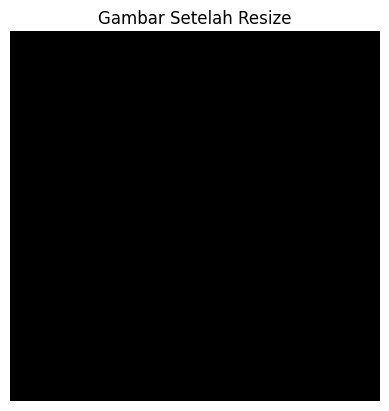

In [ ]:
import matplotlib.pyplot as plt

# Ambil gambar pertama dari batch
single_image = selected_image[0]

# Cetak dimensi gambar setelah resize
print("Dimensi gambar setelah resize:", single_image.shape)

# Cetak gambar setelah resize
plt.imshow(single_image.numpy().astype("uint8"))
plt.title('Gambar Setelah Resize')
plt.axis('off')
plt.show()


In [ ]:
# model = tf.keras.Sequential([
#     base_model,
#     tf.keras.layers.Conv2D(filters=64, padding='same', kernel_size=3, activation='relu', strides=1),
#     tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
#     tf.keras.layers.Conv2D(filters=64, padding='same', kernel_size=3, activation='relu', strides=1),
#     tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),  # Tingkat dropout yang lebih tinggi
#     tf.keras.layers.Dense(128, activation='relu'),  # Lapisan Dense tambahan
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(2, activation='softmax')
# ])
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(filters=128, padding='same', kernel_size=3, activation='relu', strides=1),
    tf.keras.layers.Conv2D(filters=128, padding='same', kernel_size=3, activation='relu', strides=1),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Conv2D(filters=256, padding='same', kernel_size=3, activation='relu', strides=1),
    tf.keras.layers.Conv2D(filters=256, padding='same', kernel_size=3, activation='relu', strides=1),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(2, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 10, 10, 512)       20024384  
                                                                 
 conv2d (Conv2D)             (None, 10, 10, 128)       589952    
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 128)         0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 256)         295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 256)         590080    
                                                        

In [ ]:
# # # Menggabungkan model ke dalam model sekuen tidak terlatih
# # # Misalnya, Anda memiliki gambar V yang Anda siapkan sebelumnya
# output_of_each_layer = [layer.output for layer in model.layers]
# visualization_model = tf.keras.models.Model(inputs=model.input, outputs=output_of_each_layer)

# # # Memprediksi dengan model visualisasi
# # layer_outputs = visualization_model.predict(V)

# # # Sekarang layer_outputs berisi hasil output dari setiap layer dalam model


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.96 :
      self.model.stop_training = True

callbacks=myCallback()

total_sample = train_generator.n
n_batch = 128

history = model.fit(train_generator, epochs=100, validation_data=validation_generator, steps_per_epoch = int(total_sample/n_batch), callbacks=[callbacks])

Epoch 1/100
22/22 [==============================] - 105s 3s/step - loss: 0.7232 - accuracy: 0.4872 - val_loss: 0.6553 - val_accuracy: 0.5000
Epoch 2/100
22/22 [==============================] - 59s 3s/step - loss: 0.5859 - accuracy: 0.6960 - val_loss: 0.4481 - val_accuracy: 0.7988
Epoch 3/100
22/22 [==============================] - 60s 3s/step - loss: 0.4962 - accuracy: 0.7905 - val_loss: 0.4846 - val_accuracy: 0.8049
Epoch 4/100
22/22 [==============================] - 74s 3s/step - loss: 0.4647 - accuracy: 0.8200 - val_loss: 0.4001 - val_accuracy: 0.8293
Epoch 5/100
22/22 [==============================] - 59s 3s/step - loss: 0.4246 - accuracy: 0.8129 - val_loss: 0.3765 - val_accuracy: 0.8506
Epoch 6/100
22/22 [==============================] - 60s 3s/step - loss: 0.4673 - accuracy: 0.7986 - val_loss: 0.3782 - val_accuracy: 0.8323
Epoch 7/100
22/22 [==============================] - 57s 3s/step - loss: 0.4452 - accuracy: 0.8143 - val_loss: 0.4173 - val_accuracy: 0.8232
Epoch 8/100


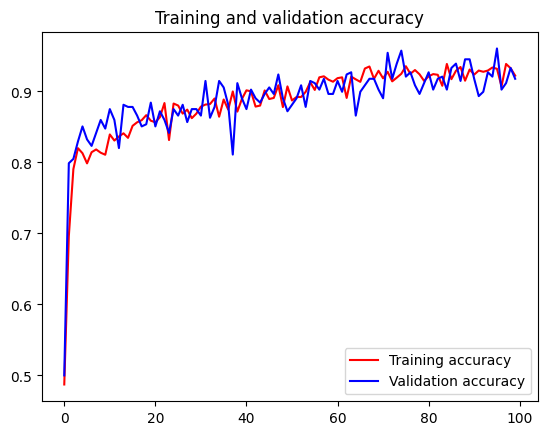

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

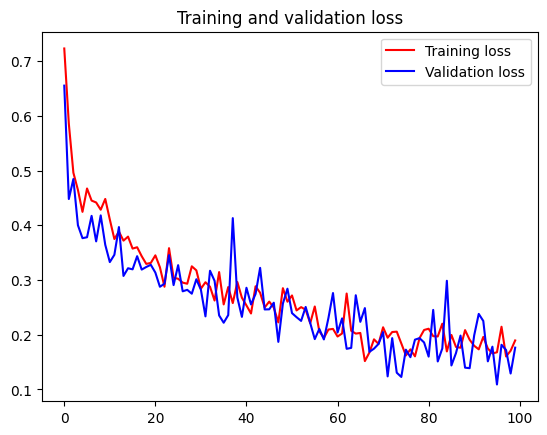

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
valid_loss, valid_accuracy = model.evaluate(validation_generator)
print("Akurasi model: {}".format(valid_accuracy))

11/11 [==============================] - 4s 376ms/step - loss: 0.1764 - accuracy: 0.9177
Akurasi model: 0.917682945728302


In [ ]:
class_order = train_generator.class_indices
print("Urutan kelas:", class_order)

Urutan kelas: {'Healthy': 0, 'Parkinson': 1}


In [ ]:
model.save("parkinston.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Simpan model secara lokal
model.save("/content/drive/My Drive/parkinson_model91normal.h5")


In [ ]:
# # Load model
# model = load_model('parkinston.h5')


# inp = model.input                                           # input placeholder
# outputs = [layer.output for layer in model.layers]          # all layer outputs
# functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs]    # evaluation functions

# # Testing
# test = np.random.random(input_shape)[np.newaxis,...]
# layer_outs = [func([test, 1.]) for func in functors]
# print layer_outs

# # Muat gambar
# img = load_img('Healthy15.png')
# x = img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x /= 255.

# # Dapatkan output lapisan
# layer_outs = get_outputs([x])

# # Cetak output lapisan
# print(layer_outs)


#Testing

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(350, 350))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    # Mendapatkan nilai probabilitas tertinggi dari hasil prediksi
    highest_prob = np.max(classes)

    # Mengatur Nilai Threshold
    threshold = 0.9

    # Daftar label yang sesuai dengan indeks prediksi
    labels = ['Healthy', 'Parkinson']

    if highest_prob >= threshold:
        # Jika probabilitas tertinggi melebihi atau sama dengan threshold, lanjutkan seperti sebelumnya
        predicted_label_index = np.argmax(classes)
        predicted_label = labels[predicted_label_index]
        print(fn)
        print(classes)
        print(f'Hasil prediksi produk: {predicted_label}')
    else:
        # Jika probabilitas tertinggi tidak memenuhi threshold
        print(f"{fn} Produk Tidak Terdeteksi")

Saving Tag.png to Tag.png
1/1 [==============================] - 0s 40ms/step
Tag.png
[[0. 1.]]
Hasil prediksi produk: Parkinson


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the model from Google Drive
model_path = '/content/drive/My Drive/parkinson_model95.h5'
model = load_model(model_path)

# Data augmentation setup
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

uploaded_images = files.upload()

for fn in uploaded_images.keys():
    path = fn
    img = load_img(path, target_size=(350, 350))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Apply data augmentation
    augmented_images = datagen.flow(x, batch_size=1)
    x = next(augmented_images)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    # Mendapatkan nilai probabilitas tertinggi dari hasil prediksi
    highest_prob = np.max(classes)

    # Mengatur Nilai Threshold
    threshold = 0.1

    # Daftar label yang sesuai dengan indeks prediksi
    labels = ['Healthy', 'Parkinson']

    if highest_prob >= threshold:
        # Jika probabilitas tertinggi melebihi atau sama dengan threshold, lanjutkan seperti sebelumnya
        predicted_label_index = np.argmax(classes)
        predicted_label = labels[predicted_label_index]
        print(fn)
        print(classes)
        print(f'Hasil prediksi produk: {predicted_label}')
    else:
        # Jika probabilitas tertinggi tidak memenuhi threshold
        print(f"{fn} Produk Tidak Terdeteksi")


Saving Salinan Gambaran Umum.drawio.png to Salinan Gambaran Umum.drawio.png


1/1 [==============================] - 0s 315ms/step
Salinan Gambaran Umum.drawio.png
[[1. 0.]]
Hasil prediksi produk: Healthy
